<a href="https://colab.research.google.com/github/RPAD676Spring2025/lab-3-jiwonchungpark/blob/main/Lab3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lab 3: Analyzing Data in Python**

# RPAD 676: Data Science for the Public Good

## Author: Jiwon Park
## Date: Feb 20, 2025

## Instructions
In this assignment, you will conduct your own analysis using the provided dataset. Follow the prompts in each section and write the necessary Python code to complete the tasks.

**Tasks:**
- Load and explore the dataset
- Perform basic data cleaning (handling missing values, etc.)
- Generate descriptive statistics
- Create at least one meaningful visualization
- Summarize key insights from your analysis

Remember to document your thought process in markdown cells throughout the notebook.

In [3]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with actual file path)
data = pd.read_csv('digital_services_data.csv')  # Replace with actual dataset file

# Display the first few rows
data.head()

,user_id,TimeTaken,UserSatisfaction,Age,DisabilityStatus,DigitalLiteracy,Gender,EmploymentStatus,EducationLevel,InternetAccess,ErrorRates,RequestedHelp,SatisfactionOtherServices,WillingnessFutureUse,ReceivesSocialServices,Agency
0,2,919,4,38,0,5,Female,Retired,Some College,Broadband,1,0,6,10,0,Department of Health and Human Services
1,9,759,10,78,0,5,Male,Employed,High School,Broadband,1,0,3,8,0,Department of Public Safety
2,13,853,8,45,0,3,Female,Unemployed,Bachelor,Broadband,2,0,6,10,0,Department of Education
3,15,503,4,66,0,3,Male,Student,Bachelor,Broadband,1,0,2,1,0,Department of Public Safety
4,25,857,7,69,0,1,Female,Employed,Some College,Mobile Data,4,0,3,1,0,Department of Education


## Descriptive Statistics

Compute and interpret basic statistics for the dataset:
- Mean, median, mode
- Standard deviation, min, max
- Any other relevant metrics

_Write your code below:_

In [4]:
print("Descriptive Statistics for Numeric Variables:")
print(data.describe())

Descriptive Statistics for Numeric Variables:
           user_id    TimeTaken  UserSatisfaction          Age  \
count  1000.000000  1000.000000       1000.000000  1000.000000   
mean    500.500000  1059.025000          4.946000    49.039000   
std     288.819436   344.668741          2.901293    17.891998   
min       1.000000     0.000000          1.000000    18.000000   
25%     250.750000   830.500000          2.000000    34.000000   
50%     500.500000  1064.000000          5.000000    50.000000   
75%     750.250000  1274.000000          7.000000    64.000000   
max    1000.000000  2136.000000         10.000000    79.000000   

       DisabilityStatus  DigitalLiteracy   ErrorRates  RequestedHelp  \
count       1000.000000      1000.000000  1000.000000    1000.000000   
mean           0.153000         3.053000     2.387000       0.287000   
std            0.360168         1.397907     2.384726       0.452588   
min            0.000000         1.000000     0.000000       0.000000   

## Data Visualization

Create at least one visualization that highlights an interesting aspect of the dataset. You may use bar plots, histograms, scatter plots, or other relevant charts.

_Write your code below:_

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


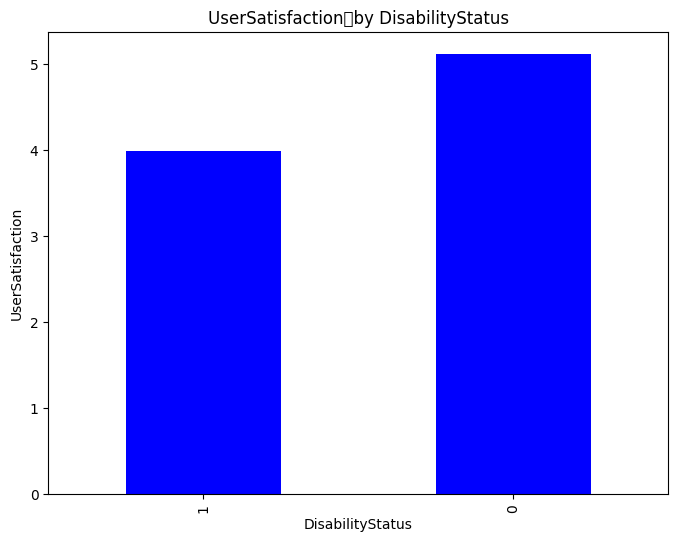

In [18]:
data.groupby('DisabilityStatus')['UserSatisfaction'].mean().sort_values().plot(kind='bar', color='blue', figsize=(8,6))
plt.xlabel("DisabilityStatus")
plt.ylabel("UserSatisfaction")
plt.title("UserSatisfaction	by DisabilityStatus")
plt.show()

The group with disability shows lower user satisfaction.

## Inferential Statistics

### T-Tests
Compare means across two groups using the t-test. Calculate the means, conduct the t-test, and summarize the findings and what they say about the relationship between the variables.

_Write your code below:_

In [11]:
outcome_variable = 'UserSatisfaction'  # Change to the variable of interest
categorical_variable = 'DisabilityStatus'  # Change to the desired categorical variable

specific_grouped_means = data.groupby(categorical_variable)[outcome_variable].mean().round(2)

print(f"\nMean of {outcome_variable} grouped by {categorical_variable}:")
print(specific_grouped_means)


Mean of UserSatisfaction grouped by DisabilityStatus:
DisabilityStatus
0    5.12
1    3.99
Name: UserSatisfaction, dtype: float64


In [15]:
from scipy import stats
t_stat, p_val = stats.ttest_ind(
    data[data['DisabilityStatus'] == 1]['UserSatisfaction'],
    data[data['DisabilityStatus'] == 0]['UserSatisfaction']
)
print(f"T-test: Effect of Disability on UserSatisfaction (in Seconds), t-statistic={t_stat:.4f}, p-value={p_val:.4f}")

T-test: Effect of Disability on UserSatisfaction (in Seconds), t-statistic=-4.4540, p-value=0.0000


UserSatisfaction between people with and without disabilities are statistically different since the p-value is less than 0.05.

### ANOVA
Compare means across two groups using the t-test. Calculate the means, conduct the t-test, and summarize the findings and what they say about the relationship between the variables.

_Write your code below:_

In [19]:
outcome_variable = 'UserSatisfaction'  # Change to the variable of interest
categorical_variable = 'Agency'  # Change to the desired categorical variable

specific_grouped_means = data.groupby(categorical_variable)[outcome_variable].mean().round(2)
print(f"\nMean of {outcome_variable} grouped by {categorical_variable}:")
print(specific_grouped_means)


Mean of UserSatisfaction grouped by Agency:
Agency
Department of Education                    5.13
Department of Health and Human Services    4.70
Department of Housing                      4.88
Department of Public Safety                5.04
Name: UserSatisfaction, dtype: float64


In [25]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# ANOVA: Comparing UserSatisfaction across different agencies
aov = smf.ols('UserSatisfaction ~ C(Agency)', data=data).fit()
anova_table = sm.stats.anova_lm(aov, typ=2)

print("\nANOVA Results:")
print(anova_table)


ANOVA Results:
                sum_sq     df         F    PR(>F)
C(Agency)    25.144653    3.0  0.995716  0.394072
Residual   8383.939347  996.0       NaN       NaN


The null hypothesis cannot be rejected with a p-value of 0.39. This means that the difference in user satisfaction between agencies is not statistically significant.

## Key Insights

Summarize your findings in a short paragraph. What patterns or trends did you observe? Were there any surprises in the data? How might these insights be useful?

_Write your response below:_



*   The t-test indicated that the difference in user satisfaction between people with and without disabilities was statistically significant. This aligns with my expectations, as people with disabilities may experience lower user satisfaction due to accessibility challenges.

*   However, the ANOVA results suggest that user satisfaction does not significantly differ across agencies. This was surprising because since different agencies provide other services, I expected them to have varying levels of user satisfaction.


